<a href="https://colab.research.google.com/github/injoon-pij/pytorch-learning/blob/master/pytorch_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) RNN (Recurrent Neural Network)

## 1.1 Vanilla RNN (SimpleRNN)

RNN(Recurrent Neural Network) : 은닉층에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로도 보내면서, 다시 은닉층의 다음 시점 계산의 입력으로 보내는 신경망 네트워크
* Vanilla RNN(SimpleRNN) : 가장 기본적인 형태의 RNN 모델

cf.) Feed Forward Neural Network : 은닉층에서 활성화 함수를 지난 값을 오직 출력층 방향으로만 향하는 신경망 네트워크

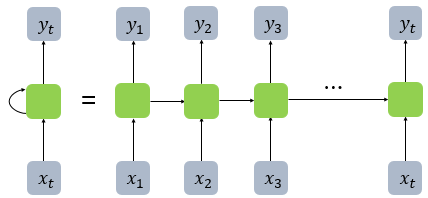

* $x$ 는 입력층의 입력 벡터, $y$ 는 출력층의 출력 벡터
* 셀(cell) : RNN에서 활성화 함수를 통해 결과값을 출력하는 역할을 하는 은닉층 노드
 * 셀(cell)은 이전의 값을 기억하려고 하는 일종의 메모리 역할을 수행하므로 이를 메모리 셀 또는 RNN 셀이라고도 표현함
* 은닉 상태(hidden state) : 메모리 셀이 출력층 방향으로 또는 다음 시점(time step)의 자신에게 보내는 값
 * 현재 시점 t에서의 메모리 셀이 갖고있는 값은 과거의 메모리 셀들의 값에 영향을 받은 것임. 즉, t 시점의 메모리 셀은 t-1 시점의 메모리 셀이 보낸 은닉 상태값을 t 시점의 은닉 상태 계산을 위한 입력값으로 사용


RNN은 입력과 출력의 길이를 다르게 설계 할 수 있으므로 다양한 용도로 사용할 수 있다. 
* RNN 셀의 각 시점별 입출력 단위는 사용자가 정의하기 나름이지만 가장 보편적인 단위는 '단어 벡터'

[단어 시퀀스에 대해서 하나의 출력을 내보내는 모델(many-to-one)]

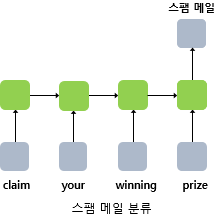

[단어 시퀸스에 대해 각 시점별 입력에 대응되는 출력을 내보내는 모델(many-to-many]

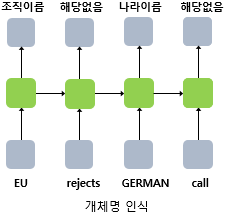

[RNN 수식]

* $x_{t}$ : 입력층의 입력 벡터

* $y_{t}$ : 출력층의 출력 벡터

* $h_{t}$ : 현재 시점 t에서의 은닉 상태값

* $W_{x}$ : 입력 벡터을 위한 가중치

* $W_{h}$ : 이전 시점 t-1의 은닉 상태값인 $h_{t-1}$을 위한 가중치

* $W_{y}$ : 은닉 상태값의 출력을 위한 가중치

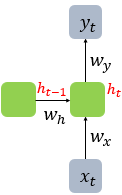

$h_{t} = tanh(W_{x} x_{t} + W_{h}h_{t−1} + b)$

$y_{t} = f(W_{y}h_{t} + b)$

* $h_{t}$ 를 계산하기 위한 활성화 함수로는 주로 하이퍼볼릭탄젠트 함수(tanh)가 사용되지만, ReLU로 바꿔 사용하는 시도도 있음

* 계산에 사용되는 각각의 가중치 $W_{x}$, $W_{h}$, $W_{y}$ 는 입력되는 시퀸스의 모든 시점에서 값을 공유함
 * 다만 은닉층의 깊이가 2개 이상이라면, 층 간 값 공유 X 

* 출력층의 출력값 $y_{t}$ 을 위한 활성화함수는 이진분류라면 시그모이드, 다중분류라면 소프트맥스 함수

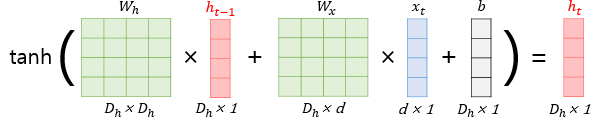

* $d$ : 입력 벡터(단어 벡터)의 차원

* $D_{h}$ : 은닉 상태의 크기

### 1.1.1 Modeling

#### Numpy

* 직접 Numpy로 RNN 층을 구현

In [ ]:
import numpy as np

timesteps = 10 # 시점의 수 (NLP에서는 보통 문장의 길이)
input_size = 4 # 입력 차원 (NLP에서는 보통 단어 벡터의 차원)
hidden_size = 8 # 은닉 상태의 크기. 메모리 셀의 용량을 말함.

inputs = np.random.random((timesteps, input_size)) # 입력 벡터

# 은닉 상태의 크기 hidden_size로 은닉 상태를 만듬.
hidden_state_t = np.zeros((hidden_size,)) # 초기 은닉 상태는 0(벡터)로 초기화

print(inputs)
print(hidden_state_t) #(8,)

[[0.68242211 0.84674257 0.38682227 0.94962972]
 [0.45779287 0.76649434 0.42590034 0.69991629]
 [0.87938668 0.74655871 0.07347717 0.00978611]
 [0.77163467 0.195718   0.97175838 0.05731882]
 [0.16683682 0.33018651 0.02460687 0.56203895]
 [0.24029459 0.31575976 0.05349578 0.84209889]
 [0.97540014 0.0899669  0.20390732 0.06031378]
 [0.10466955 0.02390323 0.43181343 0.60726854]
 [0.19623708 0.56388048 0.69232959 0.53409461]
 [0.66663116 0.07571758 0.29674492 0.00139252]]
[0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
Wx = np.random.random((hidden_size, input_size))  # 입력에 대한 가중치 (8, 4)
Wh = np.random.random((hidden_size, hidden_size)) # 은닉 상태에 대한 가중치 (8, 8)
b = np.random.random((hidden_size,)) # 편향(bias) (8,)

In [ ]:
total_hidden_states = []

# 메모리 셀 동작
for input_t in inputs: # 각 시점에 따라서 입력값이 입력됨.
  output_t = np.tanh(np.dot(Wx, input_t) + np.dot(Wh, hidden_state_t) + b) # Wx * Xt + Wh * Ht-1 + b(bias)
  total_hidden_states.append(list(output_t)) # 각 시점의 은닉 상태의 값을 축적
  print(np.shape(total_hidden_states)) # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep, output_dim)
  hidden_state_t = output_t

total_hidden_states = np.stack(total_hidden_states, axis = 0) 

print(total_hidden_states) # (timesteps, output_dim)의 크기. 이 경우 (10, 8)의 크기를 가지는 메모리 셀의 2D 텐서를 출력.

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.99537355 0.99111589 0.96613355 0.95269779 0.99062477 0.93885114
  0.95847628 0.97328028]
 [0.99997547 0.99999927 0.99996108 0.99995836 0.99999309 0.99995696
  0.99999376 0.99996426]
 [0.99994011 0.99999894 0.99990829 0.99996442 0.99998747 0.99995825
  0.99998271 0.99997455]
 [0.99996099 0.99999783 0.99995039 0.99997665 0.99997579 0.99995429
  0.99998924 0.99995658]
 [0.9998753  0.99999733 0.9997815  0.99980043 0.99998223 0.99992453
  0.99998074 0.9998608 ]
 [0.99993366 0.9999985  0.99986568 0.99984522 0.99999036 0.99994089
  0.99998738 0.99988593]
 [0.99990304 0.9999974  0.99983269 0.99993753 0.9999771  0.99994525
  0.99996671 0.99993266]
 [0.99989146 0.99999599 0.99982226 0.99981835 0.99997501 0.99991855
  0.99998364 0.99980046]
 [0.99996438 0.99999866 0.99995097 0.99995141 0.9999873  0.9999505
  0.99999424 0.99994608]
 [0.9998462  0.99999544 0.99976948 0.99990312 0.99996214 0.99992686
  0.99996448 0.99989489]]

#### nn.RNN

In [ ]:
import torch
import torch.nn as nn

In [ ]:
input_size = 5 # 입력의 크기
hidden_size = 8 # 은닉 상태의 크기

# 입력 텐서 정의 (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

# RNN memory cell 정의 (input_size, hidden_size, batch_first)
cell = nn.RNN(input_size, hidden_size, batch_first=True)

# 입력 텐서를 RNN 셀에 입력
outputs, _status = cell(inputs)

print(outputs.shape) # 마지막 은닉층에서 모든 time-step의 hidden_state (배치 크기, 시퀸스의 길이, 은닉 상태의 크기)
print(_status.shape) # 최종 time-step의 hidden_state (층의 개수, 배치 크기, 은닉 상태의 크기)

torch.Size([1, 10, 8])
torch.Size([1, 1, 8])


## 1.2 Deep Recurrent Neural Network

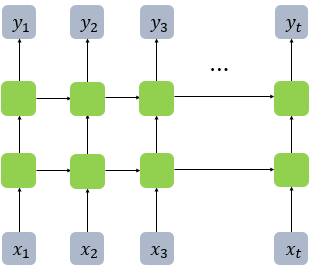

* RNN도 다수의 은닉층을 가질 수 있음 (깊은 순환 신경망)
 * 위의 그림을 보면 첫번째 은닉층은 모든 시점에서 해당 시점의 은닉 상태값을 다음 은닉층의 입력값으로서 보내줌

### 1.2.1 Modeling

In [ ]:
# 입력 텐서 정의(batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

# cell 정의 (input_size, hidden_size, num_layers, batch_first)
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True)

outputs, _status = cell(inputs)

print(outputs.shape) # 마지막 은닉층에서 모든 time-step의 hidden_state (배치 크기, 시퀸스의 길이, 은닉 상태의 크기)
print(_status.shape) # 최종 time-step의 hidden_state (층의 개수, 배치 크기, 은닉 상태의 크기)

torch.Size([1, 10, 8])
torch.Size([2, 1, 8])


## 1.3 Bidirectional Recurrent Neural Network

양방향 순환 신경망은 시점 t에서의 출력값을 예측할 때 이전 시점의 데이터뿐만 아니라, 이후 데이터로도 예측할 수 있다는 아이디어에 기반한 모델임. 즉, RNN은 기본적으로 과거 시점(time step)의 데이터들을 참고해서 정답을 예측하지만 실제 문제에서는 과거 시점의 데이터만 고려하는 것이 아니라 향후 시점의 데이터에 힌트가 있는 경우도 많기 때문에 이를 위해 고안된 것이 양방향 순환 신경망.

 * Exercise is very effective at \_\_\_\_\_\_\_ belly fat.
  * 위의 영어 빈 칸 채우기 문제를 잘 생각해보면 정답을 찾기 위해서는 이전에 나온 단어들만으로는 부족함. 목적어 belly fat(복부 지방)를 모르는 상태라면 reducing 이라는 정답을 결정하기가 어렵다.

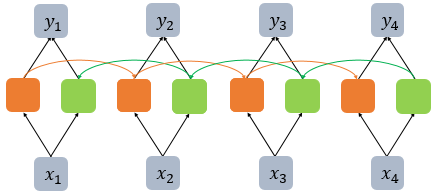

양방향 RNN은 하나의 출력값을 예측하기 위해 기본적으로 두 개의 메모리 셀을 사용함 

* 첫번째 메모리 셀은 앞에서 배운 것처럼 앞 시점의 은닉 상태(Forward States)를 전달받아 현재의 은닉 상태를 계산합니다. 
* 두번째 메모리 셀은 앞 시점의 은닉 상태가 아니라 뒤 시점의 은닉 상태(Backward States)를 전달 받아 현재의 은닉 상태를 계산합니다. 

이 두 종류의 은닉 상태값 모두 출력층에서 출력값을 예측하기 위해 사용됨(단순 연결, 합, 평균..)

[Deep Bidirectional Recurrent Neural Network]

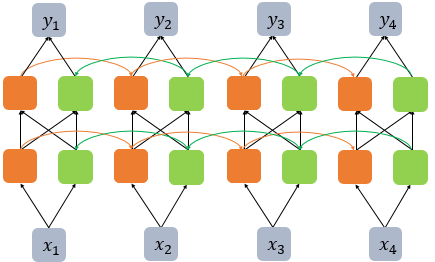

### 1.3.1 Modeling

양방향 순환 신경망을 파이토치로 구현할 때는 nn.RNN()의 인자인 bidirectional에 값을 True로 전달하면 됨.

In [ ]:
# 입력 텐서 정의(batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

# cell 정의 (input_size, hidden_size, num_layers, batch_first)
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True, bidirectional = True)

outputs, _status = cell(inputs)

print(outputs.shape) # 마지막 은닉층에서 모든 time-step의 hidden_state (배치 크기, 시퀸스의 길이, 은닉 상태의 크기 * 2)
print(_status.shape) # 최종 time-step의 hidden_state (층의 개수 * 2, 배치 크기, 은닉 상태의 크기)

torch.Size([1, 10, 16])
torch.Size([4, 1, 8])


* 마지막 은닉층에서 모든 time-step의 hidden_state : (배치 크기, 시퀸스의 길이, __은닉 상태의 크기 * 2__)
 * 이는 양방향의 은닉 상태 값들이 서로 연결(concatenate)되었기 때문

* 최종 time-step의 hidden_state : (__층의 개수 * 2__, 배치 크기, 은닉 상태의 크기)
 * 이는 정방향 기준으로는 마지막 시점에 해당되면서, 역방향 기준에서는 첫번째 시점에 해당되는 시점의 출력값을 층의 개수만큼 쌓아올렸기 때문

# 2) LSTM (Long Short-Term Memory)

## 2.1 The problem of Long-Term Dependencies

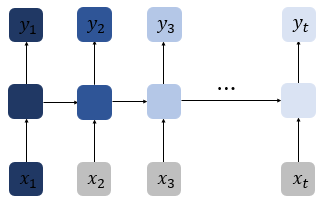

__장기 의존성 문제(the problem of Long-Term Dependencies)__

* 바닐라 RNN은 출력값이 이전의 계산 결과(은닉 상태값)에 의존함. 하지만 이는 비교적 짧은 시퀀스(sequence)에 대해서만 효과를 보이고 시점(time step)이 길어질 수록 앞의 정보가 뒤로 충분히 전달되지 못하는 단점이 존재함. 즉 위 그림에서는 뒤로 갈수록 $x_{1}$ 의 정보량은 손실되고, 시점이 충분히 긴 상황에서는 $x_{1}$ 의 전체 정보에 대한 영향력은 거의 의미가 없을 수도 있음.

* 예를 들어 때로는 가장 중요한 정보가 시점의 앞 쪽에 위치할 수도 있는데, RNN이 충분한 기억력을 가지고 있지 못한다면 문제가 발생함.
 * 모스크바에 여행을 왔는데 건물도 예쁘고 먹을 것도 맛있었어. 그런데 글쎄 직장 상사한테 전화가 왔어. 어디냐고 묻더라구 그래서 나는 말했지. 저 여행왔는데요. 여기 \_\_\_\_\_\_\_
 
 * 다음 단어를 예측하기 위해서는 장소 정보가 필요한데 장소 정보에 해당되는 단어인 '모스크바'는 상당히 앞에 위치하고 있고, RNN이 충분한 기억력을 가지고 있지 못한다면 다음 단어를 엉뚱하게 예측하게 됨.

## 2.2 LSTM(Long Short-Term Memory)

전통적인 RNN의 위와 같은 단점을 보완한 RNN의 일종을 장단기 메모리(Long Short-Term Memory)라고 하며, 줄여서 LSTM이라고 함

LSTM은 RNN과 비교하여 긴 시퀀스의 입력을 처리하는데 탁월한 성능을 보임.

### 2.2.1 Structure

아래의 그림은 LSTM의 전체적인 내부 모습을 보여준 것

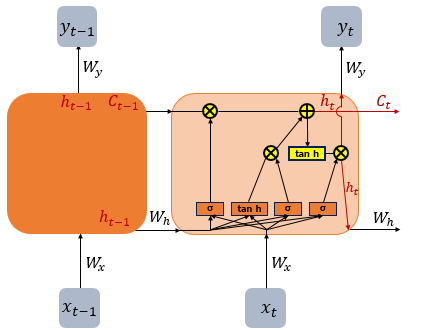

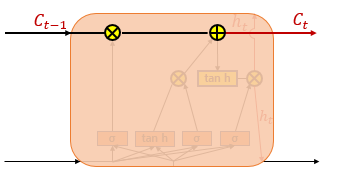

LSTM은 은닉층의 메모리 셀에 입력 게이트, 망각 게이트, 출력 게이트를 추가하여 불필요한 기억을 지우고, 기억해야할 것들을 정함. 즉, LSTM은 전통적인 RNN보다 은닉 상태(hidden state)를 계산하는 식이 복잡해졌으며, 셀 상태(cell state)라는 값을 추가함. 
* $C_{t}$ (t시점의 셀 상태) : 은닉 상태처럼 이전 시점의 셀 상태가 다음 시점의 셀 상태를 구하기 위한 입력으로서 사용됩니다.
* $\text{σ}$ : 게이트 역할을 하는 활성화 함수. 0과 1사이의 값이 나오게 되는데 이 값들은 주로 데이터를 얼마만큼 통과시킬지를 정하는 비율을 뜻함
* $tanh$ : 실질적인 정보를 지니는 데이터가 지나는 활성화함수

#### 입력 게이트

* 현재 정보를 기억하기 위한 게이트

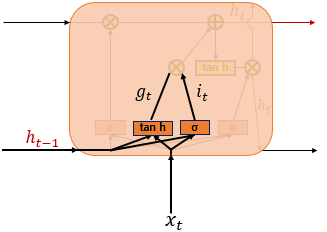

$ g_{t}=tanh(W_{xg}x_{t}+W_{hg}h_{t-1}+b_{g})$

* 현재 시점 t의 $x_{t}$ 에 가중치를 곱한 값과, 이전 시점 t-1의 은닉 상태 $h_{t-1}$ 에 가중치를 곱한 값을 더하여 하이퍼볼릭탄젠트 함수를 통과시킨 값

* 입력된 새로운 정보를 추가하는 것이 목적. (게이트 아님)

$i_{t}= \text{σ}(W_{xi}x_{t}+W_{hi}h_{t-1}+b_{i})$

* 현재 시점 t의 $x_{t}$ 에 가중치를 곱한 값과, 이전 시점 t-1의 은닉 상태 $h_{t-1}$ 에 가중치를 곱한 값을 더하여 시그모이드 함수를 지난 값

* $g_{t}$ 에 담긴 새로운 정보를 무비판적으로 수용하는 것이 아닌 가중치를 두어 수용할 수 있도록 게이트 역할을 하는 것이 목적

#### 삭제 게이트

* 기존의 기억을 삭제하기 위한 게이트

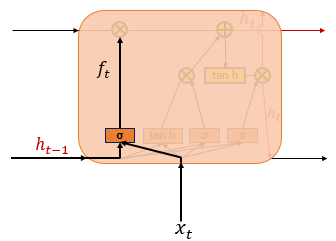

$f_{t}=\text{σ}(W_{xf}x_{t}+W_{hf}h_{t-1}+b_{f})d$

* 현재 시점 t의 $x_{t}$ 에 가중치를 곱한 값과, 이전 시점 t-1의 은닉 상태 $h_{t-1}$ 에 가중치를 곱한 값을 더하여 시그모이드 함수를 지난 값

* 0~1 사이의 결과값이 나오는데, 이 값이 곧 삭제 과정을 거친 정보의 양임. 즉 "무엇을 잊을까" 를 지시하는 게이트 역할을 하는 것이 목적

 * 0에 가까울수록 정보가 많이 삭제된 것이고 1에 가까울수록 정보를 온전히 기억한 것

#### 셀 상태(장기 상태)

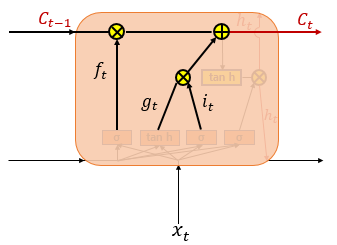

$C_{t}=f_{t}\text{ ∘ }C_{t-1}+i_{t}\text{ ∘ }g_{t}$

* 삭제 게이트에서 구한 $f_{t}$ 와 이전 셀의 상태 $C_{t-1}$ 에 대해서 원소별 곱($\text{ ∘ }$)을 진행
 * 이전 셀 상태로부터 잊어야 할 기억이 삭제됨

* 입력 게이트에서 구한 $g_{t}$ , $i_{t}$ 에 대해서 원소별 곱을 진행
 * 입력 정보들에 가중치 부여하여 기억할 정보들을 취사선택함

* 입력 게이트에서 선택된 기억을 삭제 게이트의 결과값과 더함. 이를 현재 시점 t의 셀 상태 $C_{t}$ 라고 함
 * 새로 기억해야할 정보들을 셀에 추가함

 * 다음 t+1 시점의 셀로 넘겨짐

[삭제 게이트와 입력 게이트의 영향력]

* 삭제 게이트 : 이전 시점의 입력을 얼마나 반영할지 결정

 * $f_{t} = 0 \text{ → }  C_{t}=i_{t}\text{ ∘ }g_{t}$ : 현재 시점의 셀 상태값 결정을 위한 이전 시점의 셀 상태값 $C_{t-1}$ 의 영향력이 0이 되면서, 오직 입력 게이트의 결과만이 현재 시점의 셀 상태값을 결정하는 요소가 됨

   * 이는 삭제 게이트가 완전히 닫히고 입력 게이트를 연 상태를 의미

* 입력 게이트 : 현재 시점의 입력을 얼마나 반영할지 결정

 * $i_{t}\text{ ∘ }g_{t}=0 \text{ → } C_{t}=f_{t}\text{ ∘ }C_{t-1}$ : 현재 시점의 셀 상태값 결정을 위한 입력 게이트의 결과값의 영향력이 0이 되면서, 현재 시점의 셀 상태값 $C_{t}$ 는 오직 이전 시점의 셀 상태값 $C_{t-1}$ 에만 의존

   * 이는 입력 게이트를 완전히 닫고 삭제 게이트만을 연 상태를 의미

#### 출력 게이트와 은닉 상태(단기 상태)

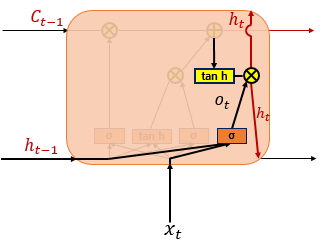

$o_{t}=\text{σ}(W_{xo}x_{t}+W_{ho}h_{t-1}+b_{o})$

* 현재 시점 t의 $x_{t}$ 에 가중치를 곱한 값과, 이전 시점 t-1의 은닉 상태 $h_{t-1}$ 에 가중치를 곱한 값을 더하여 시그모이드 함수를 지난 값

* 얼마나 출력할 지를 결정하는 게이트 역할을 하는 것이 목적으로, 현재 시점 t의 은닉 상태를 결정하는 데에 쓰임

$h_{t}=o_{t}\text{ ∘ }tanh(c_{t})$

* 셀 상태(장기 상태)값 $c_{t}$ 이 하이퍼볼릭탄젠트 함수를 지나 출력된 -1과 1사이의 값과 출력 게이트의 값 $o_{t}$ 에 원소별 곱을 진행

* 셀 상태를 표현한 값이 출력 게이트의 값 $o_{t}$ 과 연산되면서, 값이 걸러지는 효과가 발생. 즉 $tanh(c_{t})$ 값이 다음 시점의 은닉 상태(단기 상태) $h_{t}$ 에 얼마나 영향을 끼치는 가를 결정함.
* 은닉 상태(단기 상태)의 값은 또한 출력층으로도 향함.

### 2.2.2 Modeling

기존에 파이토치 RNN 셀을 사용하려고 했을 때는 다음과 같이 사용했었다.

```python
nn.RNN(input_dim, hidden_size, batch_fisrt=True)
```

LSTM 셀은 위와 유사하게 다음과 같이 사용한다.

```python
nn.LSTM(input_dim, hidden_size, batch_fisrt=True)
```